# Filter Merged CDAW/LASCO CME Events into CME-type Catalogs
This notebook is for pulling out training datasets from the event merged CDAW/LASCO catalog into different types of CME: fast-streamer, 'normal' and 'halo' CMEs. Matching non-event catalogs are also created.

In [22]:
import requests
import pandas as pd

# input data
cme_file = "../C2_cme_dataset.csv"

# output
output_stream_cme_file = "../C2_streamer_cme_positive_training_dataset.csv"
output_norm_cme_file = "../C2_norm_cme_positive_training_dataset.csv"
output_halo_cme_file = "../C2_norm_cme_positive_training_dataset.csv"

# filter criteria by central angle, [min, max]
streamer_filter = [0, 110] 
normal_filter = [115, 300]
halo_filter = [350, 360]

# the number of files, sequentially, which we will difference
File_Seq_Size = 10

In [23]:
#write out list of dataset (postitive training)
all_cme = pd.read_csv(cme_file)
len(all_cme)

41940

In [24]:
all_cme.columns

Index(['Unnamed: 0', 'filename', 'telescope', 'NumCols', 'NumRows', 'Filter',
       'Polarizer', 'datetime', 'expTime', 'date-obs', 'Remarks', 'Central',
       'Width', 'Linear', 'CDAW_Id', 'bkgnd_filename', 'bkgnd_NumCols',
       'bkgnd_NumRows', 'bkgnd_Filter', 'bkgnd_datetime', 'bkgnd_expTime',
       'bkgnd_Polarizer'],
      dtype='object')

In [25]:
import numpy as np
import matplotlib.pyplot as plt
    
def plot_data (xdata, ydata, xlabel="", ylabel="", title="", alpha=1.0):

    fig, ax = plt.subplots()
    #plt.style.use('fivethirtyeight')
    
    ax.plot(xdata, ydata, 'ro', alpha=alpha)
    ax.set_title(title)
    ax.set(xlabel=xlabel, ylabel=ylabel)

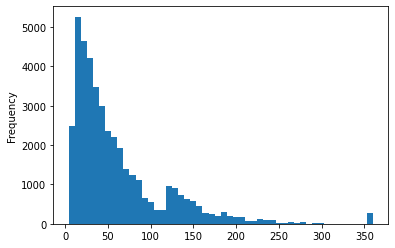

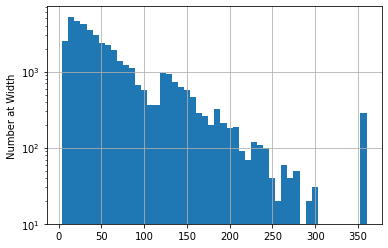

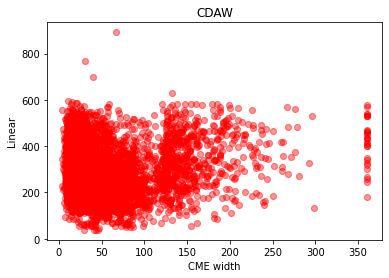

In [46]:
# examine CME widths
all_cme['Width'].plot.hist(bins=50)


fig, ax = plt.subplots()
pd.to_numeric(all_cme['Width']).hist(ax=ax, bins=50, bottom=10)
ax.set_yscale('log')
ax.set(ylabel="Number at Width")

plot_data(pd.to_numeric(all_cme['Width']), pd.to_numeric(all_cme['Linear']), xlabel='CME width', ylabel='Linear', title="CDAW", alpha=0.05)

## Now build out a negative (non-CME) training dataset for both C2 and C3

In [31]:
# load non-event merged catalogs
c2_non_events = pd.read_csv(C2_non_CME_Catalog_Filename)
c3_non_events = pd.read_csv(C3_non_CME_Catalog_Filename)
c2_non_events

,filename,datetime,date-obs,NumCols,NumRows,Filter,Polarizer,expTime,telescope
0,25000300.fts,1996-01-31 18:48:55,1996/01/31,512,512,Orang,Clear,6.4,C2
1,25000301.fts,1996-02-01 00:43:07,1996/02/01,1024,1024,Orang,Clear,25.0,C2
2,25000302.fts,1996-02-01 01:07:04,1996/02/01,1024,1024,Orang,Clear,25.1,C2
3,25000303.fts,1996-02-01 02:21:56,1996/02/01,1024,1024,Orang,Clear,25.4,C2
4,25000304.fts,1996-02-01 03:36:53,1996/02/01,1024,1024,Orang,Clear,25.1,C2
...,...,...,...,...,...,...,...,...,...
470093,25649100.fts,2017-08-31 22:34:39,2017/08/31,1024,1024,Orang,Clear,25.1,C2
470094,25649101.fts,2017-08-31 23:10:42,2017/08/31,1024,1024,Orang,Clear,25.1,C2
470095,25649102.fts,2017-08-31 23:22:37,2017/08/31,1024,1024,Orang,Clear,25.5,C2
470096,25649103.fts,2017-08-31 23:34:50,2017/08/31,1024,1024,Orang,Clear,25.1,C2


In [32]:
filts = list(c2_non_events['Filter'])
print(unique(filts))

['Blue', 'DeepR', 'Orang']


In [33]:
# apply the same filter/constraints as for CME event data 
def filter_data(data:pd.DataFrame, filtername:str, polarizer:str)->pd.DataFrame:

    slice1 = data
    
    # only 1024x1024
    slice1 = slice1[slice1['NumRows']==1024]
    slice1 = slice1[slice1['NumCols']==1024]
    
    # only right exptimes
    slice1 = slice1[slice1['expTime'] <= upper_exptime]
    slice1 = slice1[slice1['expTime'] >= lower_exptime]
    
    slice1 = slice1[slice1['Filter'].str.match(filtername)]
    slice1 = slice1 [slice1['Polarizer'].str.match(polarizer)]
    
    # TODO?: filter by time window (start year, stop year)
    # where we drew CME events from (to better match non-CME
    # activity of sun in same period)
    
    return slice1

c2_ne = filter_data(c2_non_events, C2_Filter, C2_Polarizer)
c2_ne

,filename,datetime,date-obs,NumCols,NumRows,Filter,Polarizer,expTime,telescope
1,25000301.fts,1996-02-01 00:43:07,1996/02/01,1024,1024,Orang,Clear,25.0,C2
2,25000302.fts,1996-02-01 01:07:04,1996/02/01,1024,1024,Orang,Clear,25.1,C2
3,25000303.fts,1996-02-01 02:21:56,1996/02/01,1024,1024,Orang,Clear,25.4,C2
4,25000304.fts,1996-02-01 03:36:53,1996/02/01,1024,1024,Orang,Clear,25.1,C2
5,25000305.fts,1996-02-01 04:51:44,1996/02/01,1024,1024,Orang,Clear,25.1,C2
...,...,...,...,...,...,...,...,...,...
470093,25649100.fts,2017-08-31 22:34:39,2017/08/31,1024,1024,Orang,Clear,25.1,C2
470094,25649101.fts,2017-08-31 23:10:42,2017/08/31,1024,1024,Orang,Clear,25.1,C2
470095,25649102.fts,2017-08-31 23:22:37,2017/08/31,1024,1024,Orang,Clear,25.5,C2
470096,25649103.fts,2017-08-31 23:34:50,2017/08/31,1024,1024,Orang,Clear,25.1,C2


<AxesSubplot:ylabel='Frequency'>

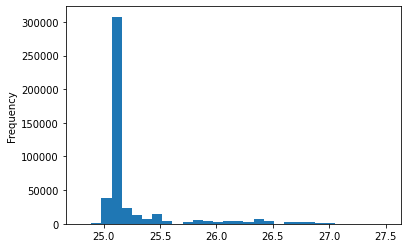

In [34]:
c2_ne['expTime'].plot.hist(bins=30)

In [35]:
import random

def random_sample(non_cme_data, cme_data:pd.DataFrame, size:int=File_Seq_Size)->pd.DataFrame:
    
    # randomly sample out X dates which have size (File_Seq_Size) or more observations
    # X = number of CME events for which we have size or more observations
    num_cme_events = len(unique(list(cme_data['CDAW_Id'])))

    date_list = unique(list(non_cme_data['date-obs']))
    
    print(num_cme_events, len(date_list))

    random_data = { col:[] for col in non_cme_data.columns }

    found_obs = 0
    # use random sample to pick random dates to get non event data from. We
    # multiply cme event number by small factor to allow for possible short intervals we cannot use
    for date in random.sample(date_list, int(num_cme_events * 1.1)): 
        if found_obs >= num_cme_events:
            # end when we match number of cme events
            print('matched number of cme events')
            break

        # pull data for this date
        date_data = non_cme_data[non_cme_data['date-obs'] == date]

        # check if its got File_Seq_Size or more files available
        if len(date_data) >= size:
            # it has sufficent, so cache it
            for row in date_data[:size].iterrows():
                for col in non_cme_data.columns:
                    random_data[col].append(row[1][col])

            found_obs += 1
            
    return pd.DataFrame(random_data)

c2_non_event_random_data = random_sample(non_cme_data=c2_ne, cme_data=cleaned3, size=File_Seq_Size)

c2_non_event_random_data

3566 7503
matched number of cme events


,filename,datetime,date-obs,NumCols,NumRows,Filter,Polarizer,expTime,telescope
0,25183129.fts,2004-11-08 01:30:31,2004/11/08,1024,1024,Orang,Clear,25.1,C2
1,25183130.fts,2004-11-08 01:52:44,2004/11/08,1024,1024,Orang,Clear,25.1,C2
2,25183131.fts,2004-11-08 02:04:44,2004/11/08,1024,1024,Orang,Clear,25.1,C2
3,25183132.fts,2004-11-08 02:28:52,2004/11/08,1024,1024,Orang,Clear,25.0,C2
4,25183133.fts,2004-11-08 02:52:29,2004/11/08,1024,1024,Orang,Clear,25.1,C2
...,...,...,...,...,...,...,...,...,...
35655,25025584.fts,1997-12-05 02:54:59,1997/12/05,1024,1024,Orang,Clear,25.1,C2
35656,25025585.fts,1997-12-05 03:07:51,1997/12/05,1024,1024,Orang,Clear,25.3,C2
35657,25025586.fts,1997-12-05 03:26:50,1997/12/05,1024,1024,Orang,Clear,25.1,C2
35658,25025587.fts,1997-12-05 03:54:58,1997/12/05,1024,1024,Orang,Clear,25.1,C2


In [36]:
#c2_non_event_random_data['telescope'] = ['C2' for t in range(0, len(c2_non_event_random_data))]

# include date-obs in this dataset so we can use it downstream as a type of non event 'id'
final_c2_non_event = c2_non_event_random_data[['datetime', 'date-obs', 'telescope', 'filename']]
final_c2_non_event.to_csv("../C2_negative_training_dataset.csv", index=None)

In [37]:
final_c2_non_event

,datetime,date-obs,telescope,filename
0,2004-11-08 01:30:31,2004/11/08,C2,25183129.fts
1,2004-11-08 01:52:44,2004/11/08,C2,25183130.fts
2,2004-11-08 02:04:44,2004/11/08,C2,25183131.fts
3,2004-11-08 02:28:52,2004/11/08,C2,25183132.fts
4,2004-11-08 02:52:29,2004/11/08,C2,25183133.fts
...,...,...,...,...
35655,1997-12-05 02:54:59,1997/12/05,C2,25025584.fts
35656,1997-12-05 03:07:51,1997/12/05,C2,25025585.fts
35657,1997-12-05 03:26:50,1997/12/05,C2,25025586.fts
35658,1997-12-05 03:54:58,1997/12/05,C2,25025587.fts


In [38]:
filts = list(c3_non_events['Filter'])
print(unique(filts))
print(unique(list(c3_non_events['Polarizer'])))

['Clear']
['Clear']


In [41]:
# Pull out C3 data, TBD

C3_Filter = 'Orang'
C3_Polarizer = 'Clear'

c3_ne = filter_data(c3_non_events, C3_Filter, C3_Polarizer)

c3_non_event_random_data = random_sample(non_cme_data=c3_ne, cme_data=cleaned3, size=File_Seq_Size)
c3_non_event_random_data['telescope'] = ['C3' for t in range(0, len(c3_non_event_random_data))]

final_c3_non_event = c3_non_event_random_data[['datetime', 'date-obs', 'telescope', 'filename']]
final_c3_non_event.to_csv("../C3_negative_training_dataset.csv", index=None)

3566 5


ValueError: Sample larger than population or is negative